In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.tokenize import word_tokenize

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/fescobar96/SMS-Spam-Classifier/master/Data/spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [0]:
data.columns = ["Spam", "Message"]

In [6]:
data["Spam"].unique()

array(['ham', 'spam'], dtype=object)

In [0]:
data["Spam"] = data["Spam"] == "spam"

In [8]:
data.head()

,Spam,Message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
pd.DataFrame(data.isnull().mean()*100, columns=["Missing Values %"])

,Missing Values %
Spam,0.0
Message,0.0


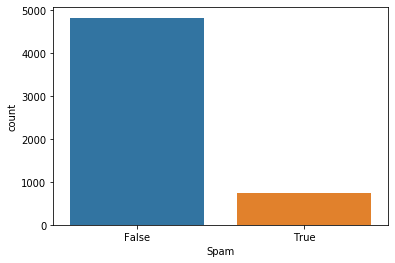

In [10]:
sns.countplot(data["Spam"])

Remove punctuation from each message

In [0]:
data["Cleaned Message"] = data["Message"].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))

Tokenize each message

In [0]:
data["Tokenized Message"] = data["Cleaned Message"].apply(lambda row: word_tokenize(row))

In [14]:
data.head()

,Spam,Message,Cleaned Message,Tokenized Message
0,False,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,False,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,False,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,False,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."
